In [101]:
import os
from md_diffusion import read_position_array
from msd_fft import calculate_diffusion_coefficient
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [3]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'

### Save numpy array and run diffusivity calcualtion

In [4]:
ALL_DATA = {}
for sim_type in ['flexible', 'rigid']:
    DATA = {}
    simdir = '%s/%s' % (data_dir, sim_type)
    for molecule in os.listdir(simdir):
        DATA[molecule.split('_')[0]] = {}
        for drx in ['x', 'y', 'z']:
            mol_simdir = os.path.join(simdir, molecule)
            pos_array = read_position_array(mol_simdir, directions=[drx], t_skip=2, log='log.%s' % molecule)
            DATA[molecule.split('_')[0]][drx] = calculate_diffusion_coefficient(pos_array, average_frames=1, fs_per_frame=1000)
    ALL_DATA[sim_type] = DATA

Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
DC_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (2.40 - 4.00 ns; $R^2$ = 0.999):
D = 8.499E-05 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
DC_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (0.80 - 3.20 ns; $R^2$ = 0.994):
D = 9.320E-05 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
DC_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (0.80 - 2.80 ns; $R^2$ = 0.209):
D = 7.297E-12 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
PCARBORANE_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (0.80 - 2.80 ns; $R^2$ = 0.999):
D = 9.263E-05 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 

Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
TPEE_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (0.80 - 2.80 ns; $R^2$ = 0.999):
D = 2.355E-06 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
TPEE_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (1.60 - 3.60 ns; $R^2$ = 1.000):
D = 6.895E-05 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
TPEE_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (0.80 - 2.80 ns; $R^2$ = 0.404):
D = 3.573E-12 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
HtBDC_Cu110 | Shape: (8001 frames, 10 runs, 1 dimensions) | Saved: None
Best fit: (2.40 - 4.00 ns; $R^2$ = 0.998):
D = 1.053E-07 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8':

### Read molecule diffusion info

In [5]:
with open('diff_data.yaml', 'r') as f:
    diff_data = yaml.load(f)

#### Sort molecules according to molecular weight

In [15]:
molecules = list(diff_data['mw'].keys())
mol_order = np.argsort([diff_data['mw'][i] for i in molecules])
molecules = [molecules[i] for i in mol_order]
colors = dict(y='#CF5955', yellow='#EAC658', z='#66AD9B', x='#4e7fad')
shades = dict(y='#672C2A', yellow='#75632C', z='#33564D', x='#3B4C5C')

In [16]:
# d_flex = [ALL_DATA['flexible'][m]['best']['cm2/s'] for m in molecules]
# d_rigid = [ALL_DATA['rigid'][m]['best']['cm2/s'] for m in molecules]
d_dctst = [diff_data['dctst'][i] for i in molecules]
mw = [diff_data['mw'][i] for i in molecules]

### Plot each direction separately

<p align="center"><img src="/assets/img/presentations/nanocar/md-diffusion-direction-vs-mw.png" height=250></p>


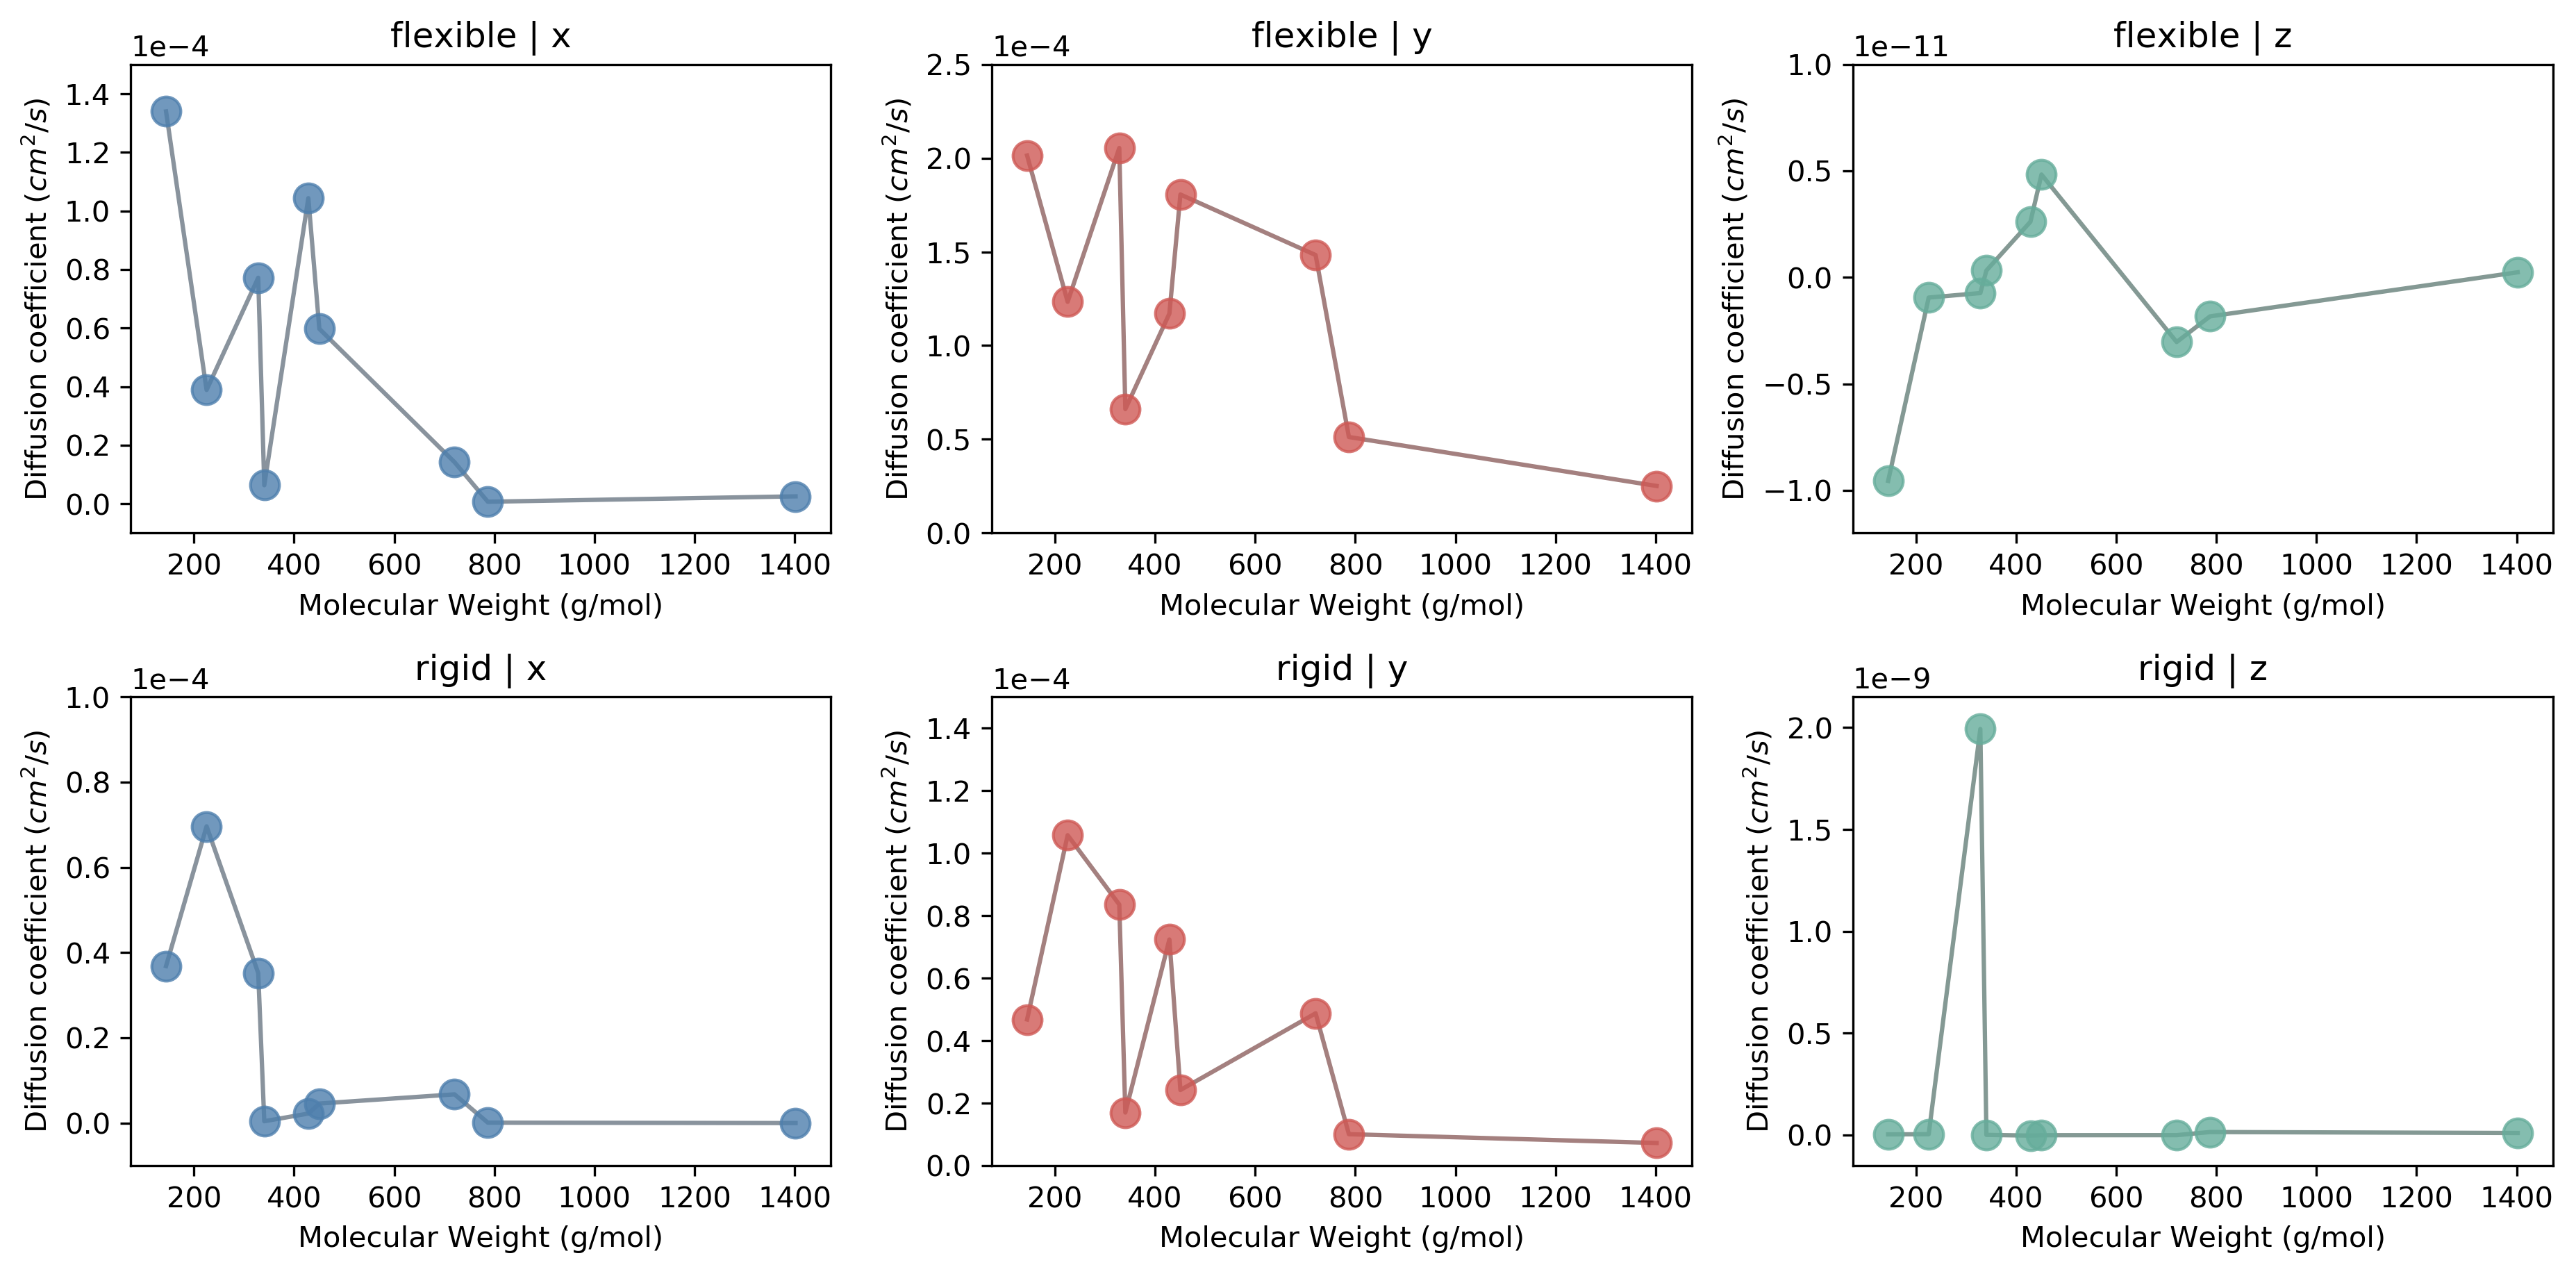

In [98]:
fig = plt.figure(figsize=(15, 7), dpi=300)
fig.subplots_adjust(hspace=.35, wspace=.23)
fit_range = '0.00-8.00'
ylims = dict(flexible=dict(x=(-1e-5, 1.5e-4), y=(0, 2.5e-4), z=(-1.2e-11, 1.0e-11)),
             rigid=dict(x=(-1e-5, 1.0e-4), y=(0, 1.5e-4), z=(-1.5e-10, 21.5e-10)))
idx = 1
for sim_type in ['flexible', 'rigid']:
    for drx in ['x', 'y', 'z']:
        ax = fig.add_subplot(2, 3, idx)
        diff = [ALL_DATA[sim_type][m][drx][fit_range]['cm2/s'] for m in molecules]
        ax.plot(mw, diff, c=shades[drx], alpha=0.6)
        ax.scatter(mw, diff, c=colors[drx], s=100, alpha=0.8, zorder=3)
        ax.set_xlabel('Molecular Weight (g/mol)')
        ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
        ax.set_title('%s | %s' % (sim_type, drx))
        ax.set_ylim(ylims[sim_type][drx])
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        idx += 1
        
pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'md-diffusion-direction-vs-mw.png'
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)

### Plot directionality

<p align="center"><img src="/assets/img/presentations/nanocar/md-diffusion-directionality-ratio.png" height=250></p>


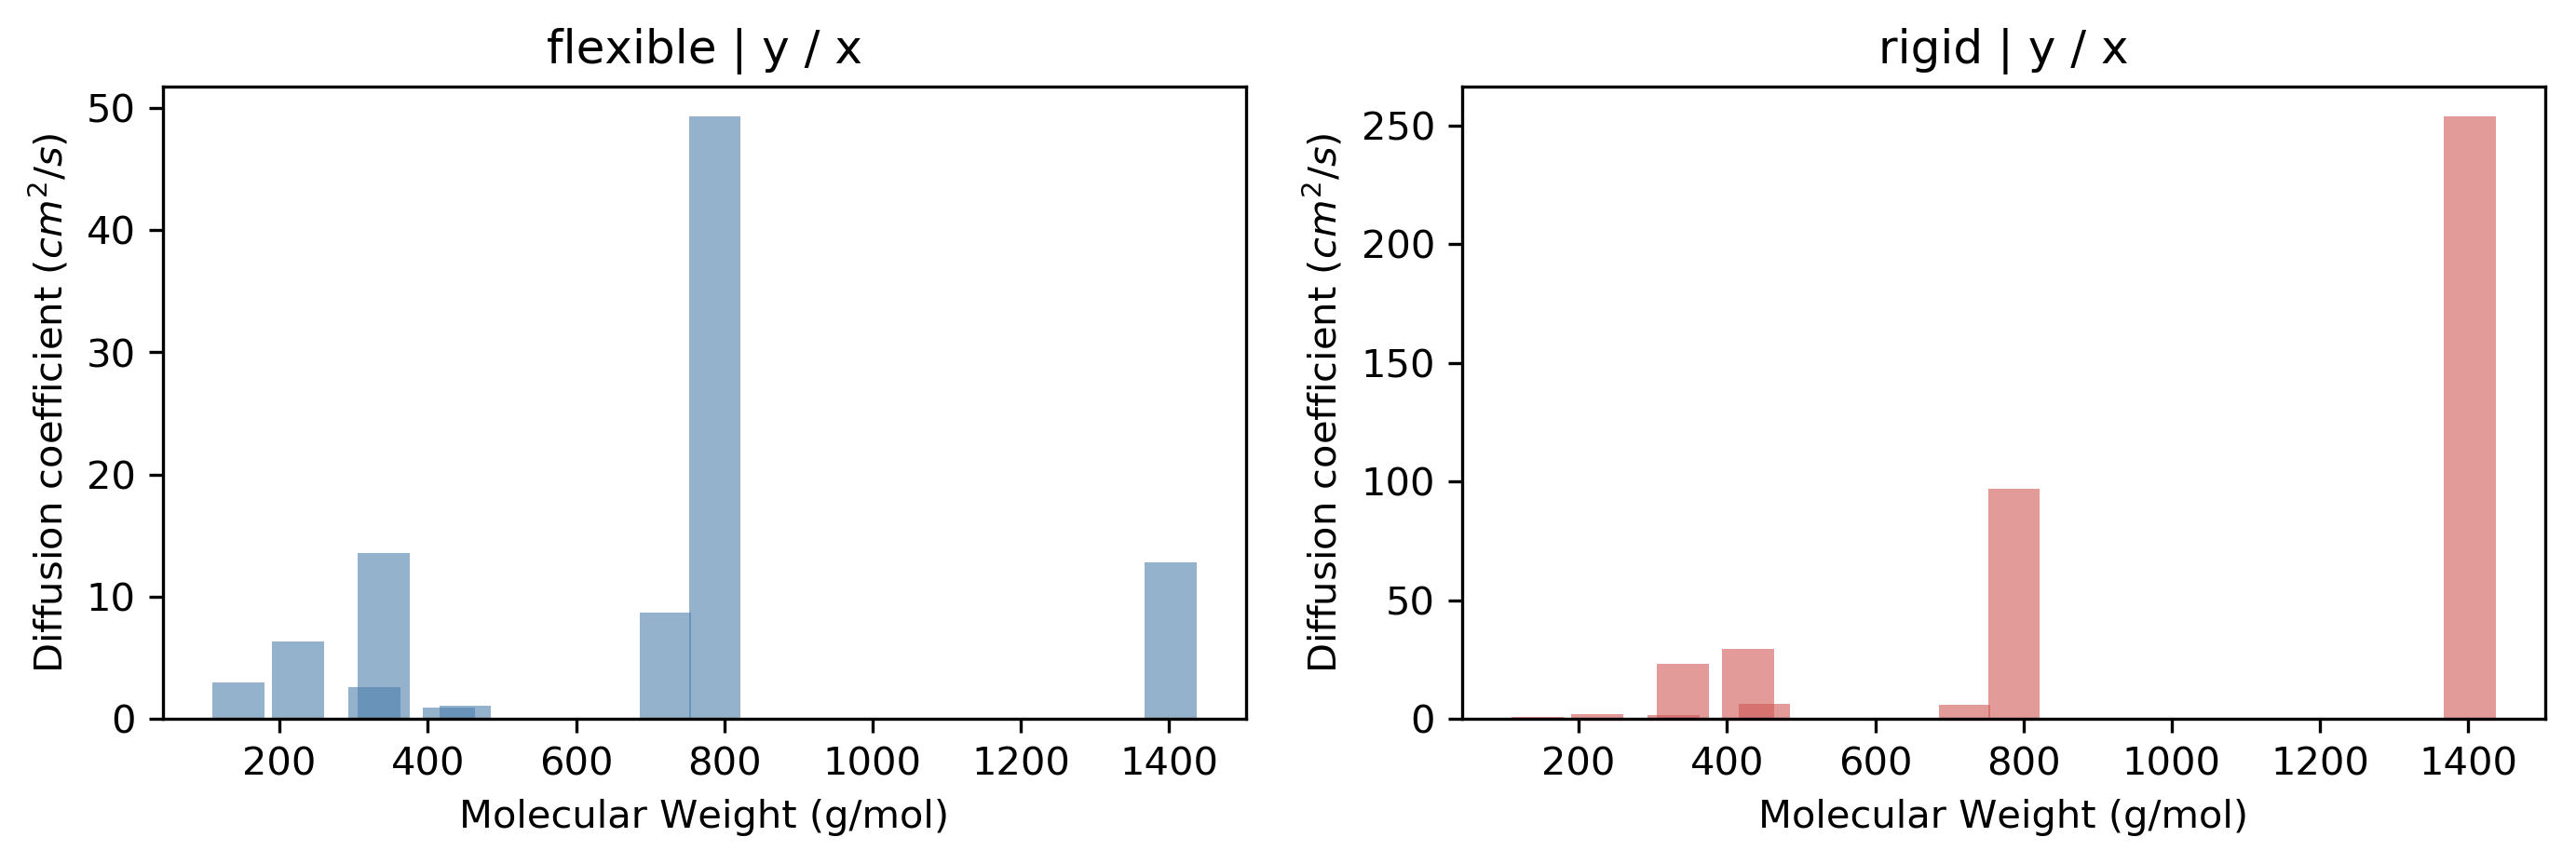

In [100]:
fig = plt.figure(figsize=(11, 3), dpi=300)
fig.subplots_adjust(hspace=.5, wspace=.2)
fit_range = 'best'
ylims = dict(x=(-1e-5, 1.5e-4), y=(-1e-5, 4e-4), z=(-5e-11, 3e-11))
colors_sim = dict(rigid='#CF5955', flexible='#4e7fad')

for idx, sim_type in enumerate(['flexible', 'rigid'], start=1):
    ax = fig.add_subplot(1, 2, idx)
    y_diff = np.array([ALL_DATA[sim_type][m]['y'][fit_range]['cm2/s'] for m in molecules])
    x_diff = np.array([ALL_DATA[sim_type][m]['x'][fit_range]['cm2/s'] for m in molecules])
    directionality = y_diff / x_diff
    ax.bar(mw, directionality, width=70, align='center', color=colors_sim[sim_type], alpha=0.6)
    ax.set_xlabel('Molecular Weight (g/mol)')
    ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
    ax.set_title('%s | y / x' % sim_type)
    for mi, m in enumerate(molecules):
        pass
        # ax.text(mw[mi], directionality[mi], m, rotation='vertical')

pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'md-diffusion-directionality-ratio.png'
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)